In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
import pandas as pd


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel
from simulation_engine.core.security_model import SecurityModel
from simulation_engine.engine.sim_engine import SimulationEngine
from simulation_engine.utils.visualization import plot_results

from experiments.evaluate_metrics import EvaluateMetrics

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../examples'))

# Function to load configuration files
def load_config_file(filename):
    return ConfigManager.load_config(os.path.join(BASE_DIR, filename))

# Load all configurations
econ_config = load_config_file('example_economic_model.json')
sec_config = load_config_file('example_security_model.json')
val_config = load_config_file('example_validator_config.json')
net_config = load_config_file('example_network_architecture_config.json')

# Initialize models with configurations
economic_model = EconomicModel(
    econ_config['total_supply'], 
    econ_config['initial_distribution'], 
    econ_config['fee_rate'],
    econ_config['transaction_volume'],
    econ_config['staking_rewards'],
    econ_config['lock_up_periods']
)

security_model = SecurityModel(sec_config['slashing_conditions'])

validator_config = ValidatorConfig(
    val_config['criteria'],
    val_config['min_stake'],
    val_config['staking_token'],
    val_config['reward_mechanisms'],
    val_config['performance_metrics']
)

network_model = NetworkArchitectureModel(
    net_config['transaction_throughput_params'],
    net_config['block_size_params'],
    net_config['consensus_params'],
    net_config['latency_params'],
    net_config['topology_params'],
    net_config['fault_tolerance_params']
)

# Run simulations
#economics = economic_model.simulate_economics()
#security = security_model.simulate_security()
#validators = validator_config.simulate_validator_config()
#network_architecture = network_model.simulate_network_architecture()
#eval_metrics = EvaluateMetrics(economic_model, security_model, validator_config, network_model)

#simulation_engine = SimulationEngine(eval_metrics, time_steps=365)
#simulation_engine.run()

{'period': 1, 'transaction_volume': 1033262.867128254, 'current_supply': 100994782.10837099, 'fees_collected': 10332.62867128254, 'token_burned': 5166.31433564127, 'staking_rewards': {'short_term': 0.005, 'medium_term': 0.02, 'long_term': 0.06}, 'total_rewards': 0.08499999999999999, 'inflation_tokens': 1999896.675413287, 'deflation_tokens': 999948.3377066435, 'primary_to_secondary': 103326.28671282541, 'secondary_token_supply': 396673.7132871746, 'economic_scenarios': {'high_volume': 1549894.300692381, 'low_volume': 516631.433564127, 'validator_exit': 10000000.0}}


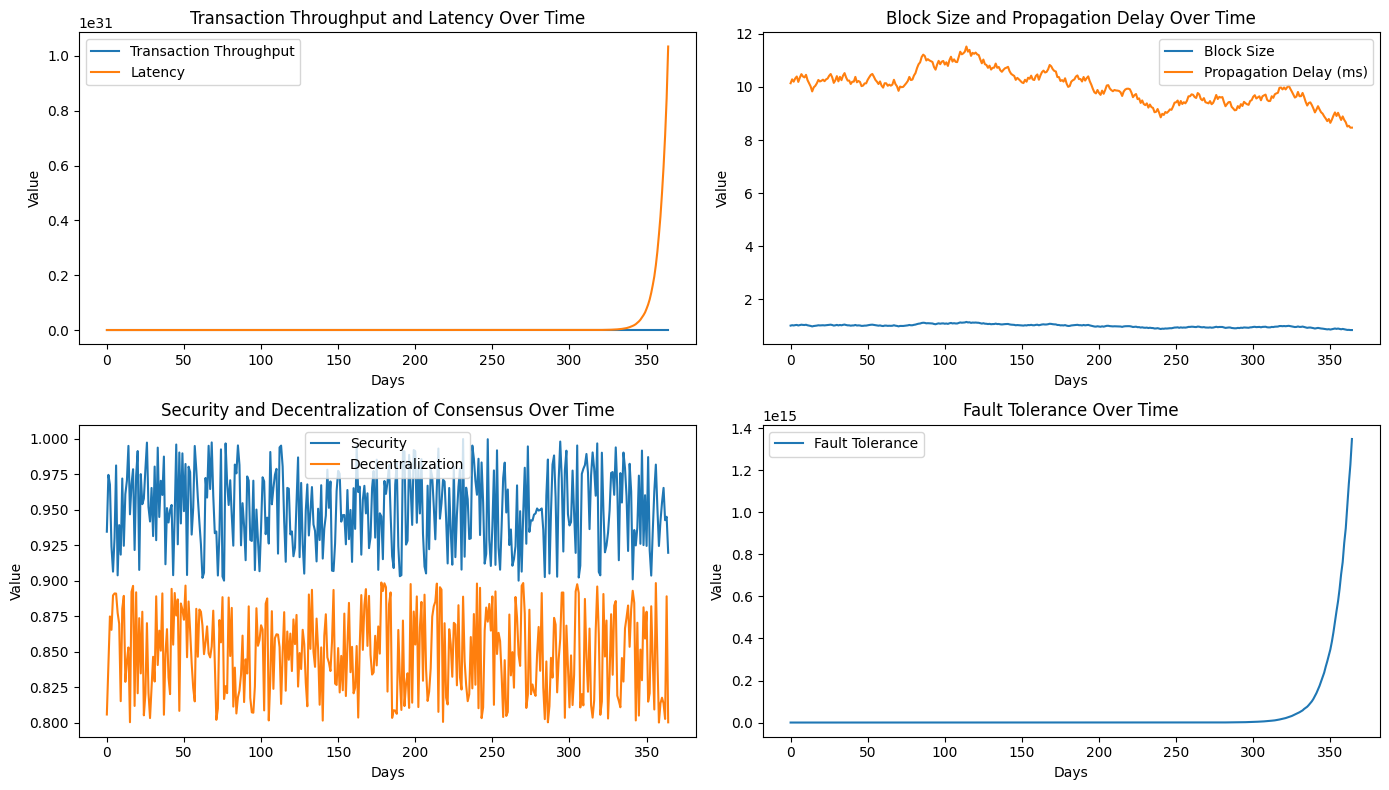

In [2]:
import matplotlib.pyplot as plt


# Run the simulation
results = []
for day in range(365):
    result = network_model.simulate_network_architecture()
    results.append(result)

# Extract data for plotting
throughput = [res['transaction_throughput'] for res in results]
latency = [res['latency'] for res in results]
block_sizes = [res['block_size_info']['block_size'] for res in results]
propagation_delays = [res['block_size_info']['propagation_delay'] for res in results]
security = [res['consensus_info']['security'] for res in results]
decentralization = [res['consensus_info']['decentralization'] for res in results]
fault_tolerance = [res['fault_tolerance'] for res in results]

# Plotting Transaction Throughput and Latency Over Time
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(throughput, label='Transaction Throughput')
plt.plot(latency, label='Latency')
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Transaction Throughput and Latency Over Time')
plt.legend()

# Plotting Block Size and Propagation Delay Over Time
plt.subplot(2, 2, 2)
plt.plot(block_sizes, label='Block Size')
plt.plot(propagation_delays, label='Propagation Delay (ms)')
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Block Size and Propagation Delay Over Time')
plt.legend()

# Plotting Security and Decentralization of Consensus Mechanism Over Time
plt.subplot(2, 2, 3)
plt.plot(security, label='Security')
plt.plot(decentralization, label='Decentralization')
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Security and Decentralization of Consensus Over Time')
plt.legend()

# Plotting Fault Tolerance and Network Efficiency Over Time
plt.subplot(2, 2, 4)
plt.plot(fault_tolerance, label='Fault Tolerance')
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Fault Tolerance Over Time')
plt.legend()

plt.tight_layout()
plt.show()


# Economic Model Simulation

In [2]:
simulation_results = economic_model.run_simulation(
    inflation_rate=0.02,
    deflation_rate=0.01,
    conversion_rate=0.1,
    secondary_token_supply=500000,
    periods=12  # Simulating for 12 periods (e.g., months or years)
)

# Example: Printing simulation results for the first period
print(simulation_results[0])

{'period': 1, 'transaction_volume': 99787.2130598094, 'current_supply': 100999496.82449906, 'fees_collected': 997.8721305980939, 'token_burned': 498.93606529904696, 'staking_rewards': {'short_term': 0.015, 'medium_term': 0.18, 'long_term': 0.5475}, 'total_rewards': 0.7424999999999999, 'inflation_tokens': 1999990.0361286942, 'deflation_tokens': 999995.0180643471, 'primary_to_secondary': 9978.72130598094, 'secondary_token_supply': 490021.27869401907, 'economic_scenarios': {'high_volume': 149680.81958971408, 'low_volume': 49893.6065299047, 'validator_exit': 10000000.0}}


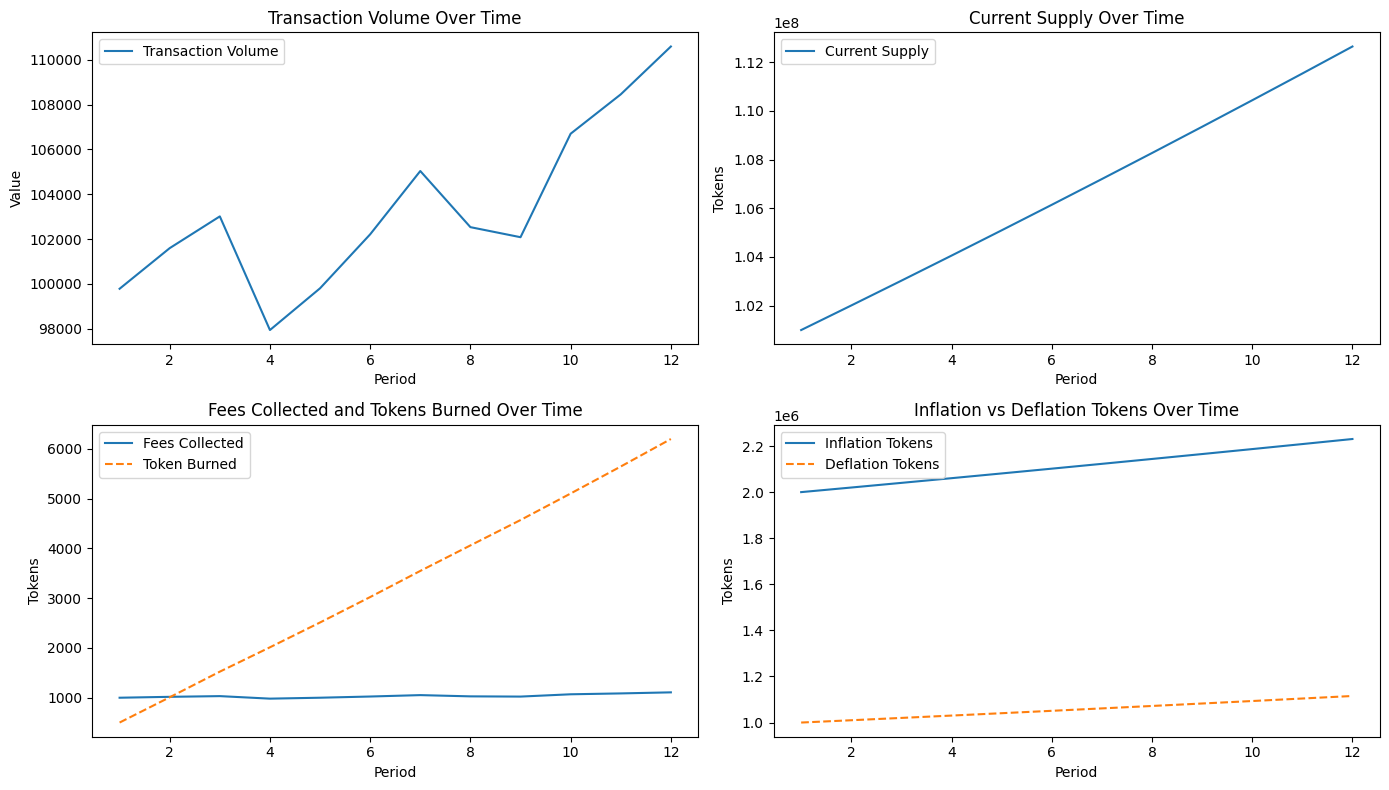

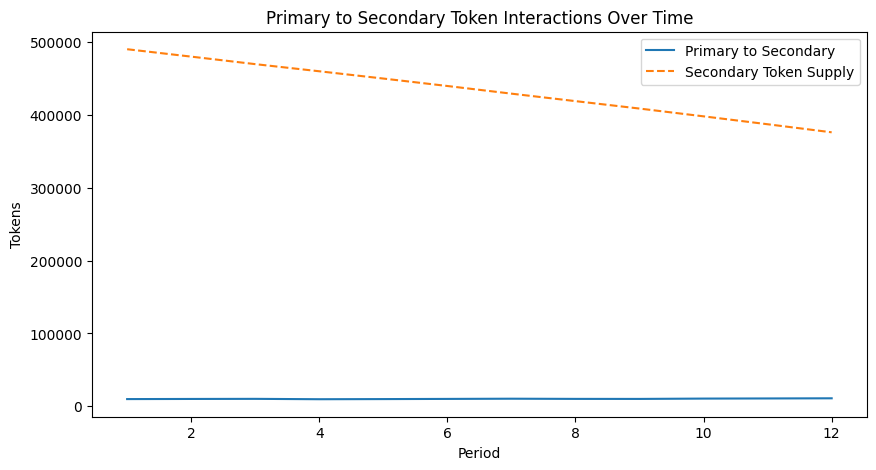

In [4]:
import matplotlib.pyplot as plt

# Extract data for plotting
periods = [result['period'] for result in simulation_results]
transaction_volume = [result['transaction_volume'] for result in simulation_results]
current_supply = [result['current_supply'] for result in simulation_results]
fees_collected = [result['fees_collected'] for result in simulation_results]
token_burned = [result['token_burned'] for result in simulation_results]
inflation_tokens = [result['inflation_tokens'] for result in simulation_results]
deflation_tokens = [result['deflation_tokens'] for result in simulation_results]
primary_to_secondary = [result['primary_to_secondary'] for result in simulation_results]
secondary_token_supply = [result['secondary_token_supply'] for result in simulation_results]

# Plotting transaction volume and current supply over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(periods, transaction_volume, label='Transaction Volume')
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Transaction Volume Over Time')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(periods, current_supply, label='Current Supply')
plt.xlabel('Period')
plt.ylabel('Tokens')
plt.title('Current Supply Over Time')
plt.legend()

# Plotting fees collected and tokens burned over time
plt.subplot(2, 2, 3)
plt.plot(periods, fees_collected, label='Fees Collected')
plt.plot(periods, token_burned, label='Token Burned', linestyle='--')
plt.xlabel('Period')
plt.ylabel('Tokens')
plt.title('Fees Collected and Tokens Burned Over Time')
plt.legend()

# Plotting inflation vs deflation tokens over time
plt.subplot(2, 2, 4)
plt.plot(periods, inflation_tokens, label='Inflation Tokens')
plt.plot(periods, deflation_tokens, label='Deflation Tokens', linestyle='--')
plt.xlabel('Period')
plt.ylabel('Tokens')
plt.title('Inflation vs Deflation Tokens Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting primary to secondary token interactions over time
plt.figure(figsize=(10, 5))
plt.plot(periods, primary_to_secondary, label='Primary to Secondary')
plt.plot(periods, secondary_token_supply, label='Secondary Token Supply', linestyle='--')
plt.xlabel('Period')
plt.ylabel('Tokens')
plt.title('Primary to Secondary Token Interactions Over Time')
plt.legend()
plt.show()
